In [18]:
import pandas as pd
#load data
df_original = pd.read_csv("assets/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv")

# dataframe for editing
df = df_original 

#converting data value to celsius
df["Data_Value"] = df["Data_Value"]/10
df = df.drop(columns=["ID"])
#sorting data by date
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by="Date")
df.head(50)

#Creating two new dataframes for and tmax and tmin
df_max = df[df["Element"]=="TMAX"]
df_min = df[df["Element"]=="TMIN"]

#Simplify df
df_max.drop(columns=["Element"], inplace= True)
df_min.drop(columns=["Element"], inplace=True)
#df_min = df_min.set_index("Date")
#df_max = df_max.set_index("Date")

#Group by date
df_min = df_min.groupby([df_min['Date'].dt.date]).min()
df_max = df_max.groupby([df_max['Date'].dt.date]).max()

#Drop leap year dates
df_max.index = pd.to_datetime(df_max.index)
df_max = df_max[~((df_max.index.month == 2) & (df_max.index.day == 29))]

df_min.index = pd.to_datetime(df_min.index)
df_min = df_min[~((df_min.index.month == 2) & (df_min.index.day == 29))]

#Separate 2015
max_2015 = df_max[df_max.index.year >= 2015]
min_2015 = df_min[df_min.index.year >= 2015]
DF_max = df_max[df_max.index.year < 2015]
DF_min = df_min[df_min.index.year < 2015]

#Change datetime format to day of year
max_2015.index = max_2015.index.to_series().apply(lambda x: x.strftime('%m-%d'))
min_2015.index = min_2015.index.to_series().apply(lambda x: x.strftime('%m-%d'))
DF_min.index = DF_min.index.to_series().apply(lambda x: x.strftime('%m-%d'))
DF_max.index = DF_max.index.to_series().apply(lambda x: x.strftime('%m-%d'))

#Group by day of year
record_min = DF_min.groupby(DF_min.index).min()
record_max = DF_max.groupby(DF_max.index).max()

#2015 temps that break records
max_2015 = max_2015[max_2015["Data_Value"]>record_max["Data_Value"]]
min_2015 = min_2015[min_2015["Data_Value"]<record_min["Data_Value"]]


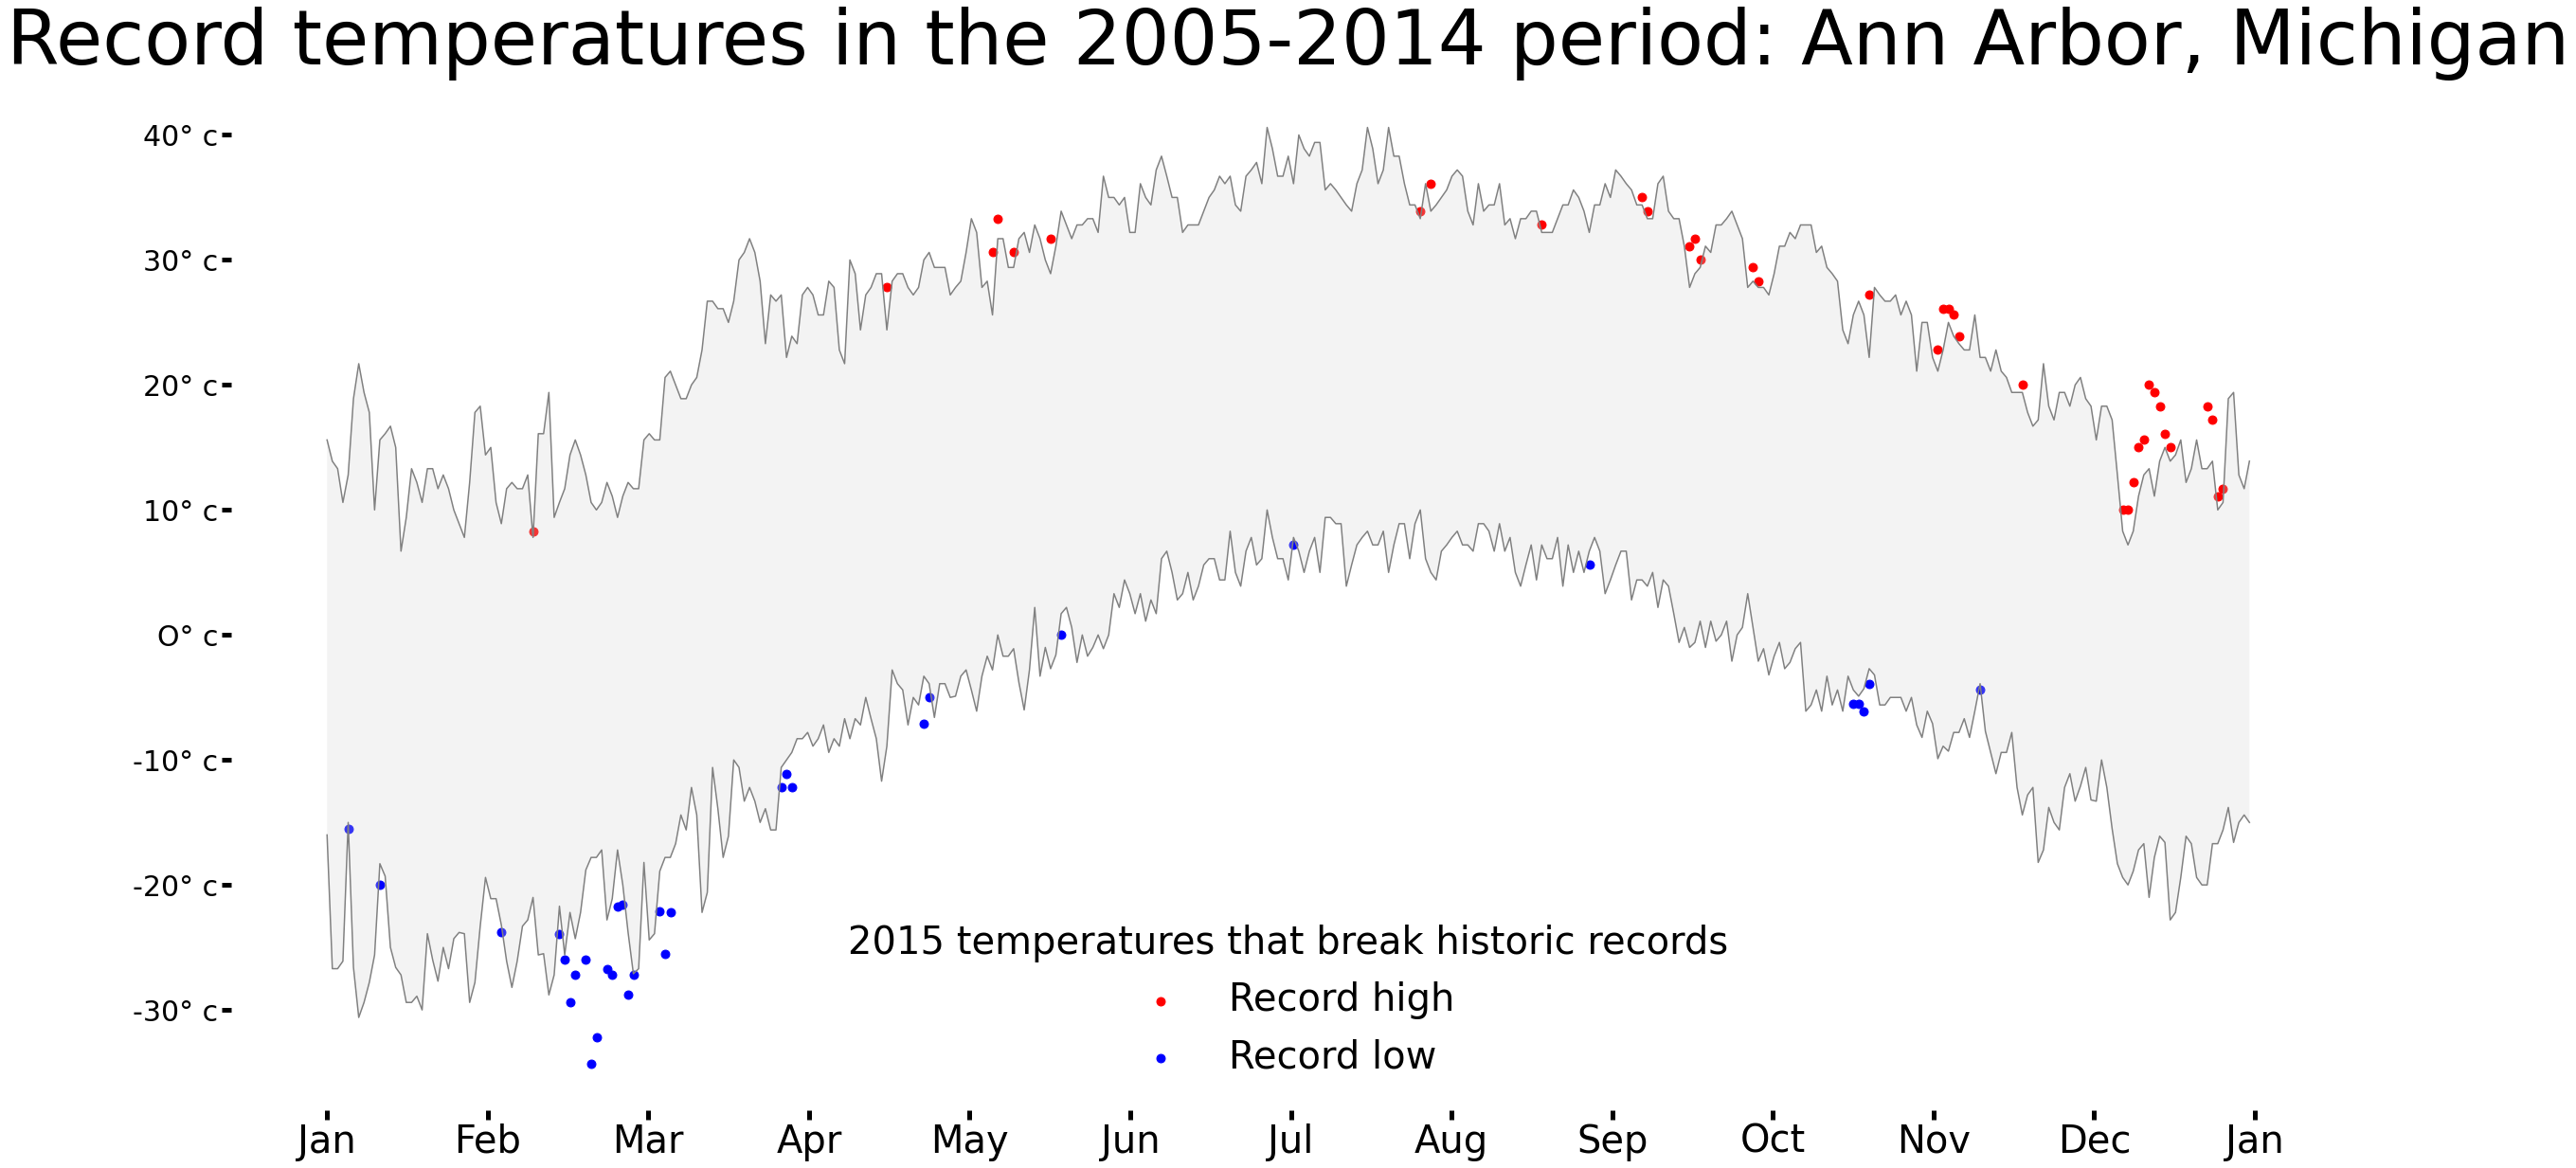

In [34]:
import matplotlib.pyplot as plt
import numpy as np
#Create figure
plt.figure(figsize=(40,20))

#Plot line charts
plt.plot(record_max.index, record_max["Data_Value"], record_min.index, record_min["Data_Value"],c="grey",zorder=2)

#Scatter plots
plt.scatter(max_2015.index, max_2015["Data_Value"], s=80, c="red", label="Record high",zorder=0)
plt.scatter(min_2015.index, min_2015["Data_Value"], s=80, c="blue", label="Record low",zorder=0)

#Fill between
plt.gca().fill_between(record_max.index, record_max["Data_Value"],record_min["Data_Value"], facecolor="lightgrey", alpha=0.25)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', "Jan"]

#Set x axis in monthly intervals
plt.xticks(np.linspace(0,365,13), months)
temps = ["-30° c","-20° c","-10° c","O° c", "10° c","20° c","30° c","40° c"]

#Change y axis format to add "° c"
plt.yticks(np.linspace(-30,40,8),temps)

#Remove box
for spine in plt.gca().spines.values():
    spine.set_visible(False)

#Axis style
plt.tick_params(axis ='x',
               labelsize = 40, colors ='black',width=5, length=10)
plt.tick_params(axis ='y',
               labelsize = 30, colors ='black',width=5, length= 10)

#Title and legend
plt.title("Record temperatures in the 2005-2014 period: Ann Arbor, Michigan", fontsize=80);
plt.legend(loc=8, frameon=False, title='2015 temperatures that break historic records', fontsize=40, title_fontsize=40);


plt.savefig('my_plot.png',bbox_inches='tight')

